In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-customer-data/transcript.csv
/kaggle/input/starbucks-customer-data/profile.csv
/kaggle/input/starbucks-customer-data/portfolio.csv


# 1. 기술통계 및 추정
## 1) 데이터셋 전체 구조 파악

In [47]:
transcript = pd.read_csv('/kaggle/input/starbucks-customer-data/transcript.csv')
profile = pd.read_csv('/kaggle/input/starbucks-customer-data/profile.csv')
pf = pd.read_csv('/kaggle/input/starbucks-customer-data/portfolio.csv')

In [48]:
transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [49]:
transcript['value'].value_counts()

value
{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}    14983
{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}    14924
{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}    14891
{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}    14835
{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'}    14374
                                                    ...  
{'amount': 42.31}                                       1
{'amount': 44.62}                                       1
{'amount': 42.27}                                       1
{'amount': 108.89}                                      1
{'amount': 476.33}                                      1
Name: count, Length: 5121, dtype: int64

profile.head()

In [50]:
profile.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [51]:
pf.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [52]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [53]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [54]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [55]:
print(f'Transcript data has {transcript.shape[0]} rows and {transcript.shape[1]} columns')
print(f'Profile data has {profile.shape[0]} rows and {profile.shape[1]} columns')
print(f'Portfolio data has {pf.shape[0]} rows and {pf.shape[1]} columns')

Transcript data has 306534 rows and 5 columns
Profile data has 17000 rows and 6 columns
Portfolio data has 10 rows and 7 columns


## 2) 결측치 탐색, 처리

In [56]:
transcript.isna().sum()

Unnamed: 0    0
person        0
event         0
value         0
time          0
dtype: int64

In [57]:
profile.isna().sum()

Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [58]:
pf.isna().sum()

Unnamed: 0    0
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

> Profile 데이터셋에만 결측치가 있다. 이거는 제거해주도록 한다.   
> 그리고 profile, transcript, portfolio의 Unnamed 컬럼도 제거한다

In [59]:
profile = profile.dropna(subset=['gender', 'income'])
profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14825 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               14825 non-null  int64  
 3   id                14825 non-null  object 
 4   became_member_on  14825 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 810.7+ KB


In [60]:
transcript.drop('Unnamed: 0', axis=1, inplace=True)
pf.drop('Unnamed: 0', axis=1, inplace=True)
profile.drop('Unnamed: 0', axis=1, inplace=True)

## 3) 기술통계량 계산

In [61]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [62]:
profile.describe()

,age,became_member_on,income
count,14825.000000,1.482500e+04,14825.000000
mean,54.393524,2.016689e+07,65404.991568
std,17.383705,1.188565e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


In [63]:
pf.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


## 4) 데이터 분포 탐색 (왜도, 첨도, 정규성)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


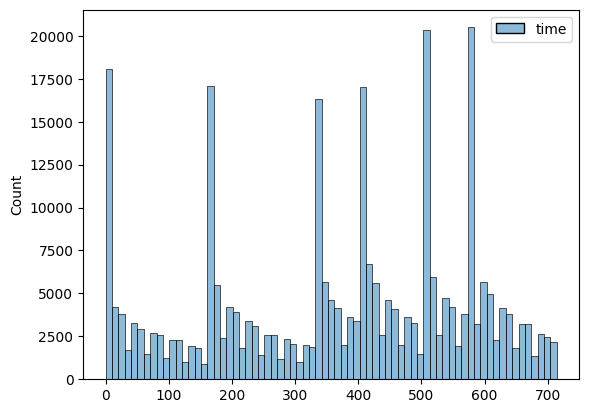

In [65]:
sns.histplot(transcript);

In [66]:
print(f'왜도: {round(transcript.time.skew(), 2)}')
print(f'첨도: {round(transcript.time.kurt(), 2)}')


왜도: -0.32
첨도: -1.01


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


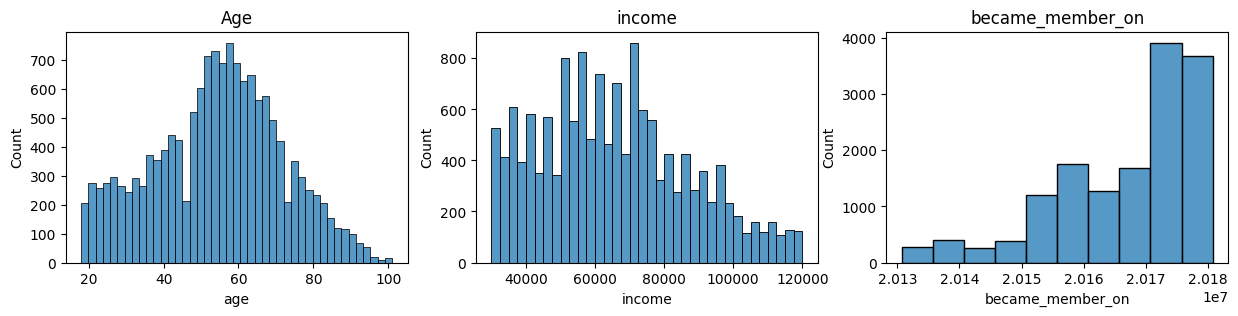

In [67]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
sns.histplot(x='age', data=profile, ax=axes[0])
axes[0].set_title('Age')

sns.histplot(x='income', data=profile, ax=axes[1])
axes[1].set_title('income')

sns.histplot(x='became_member_on', data=profile, ax=axes[2], bins=10)
axes[2].set_title('became_member_on')

plt.show()

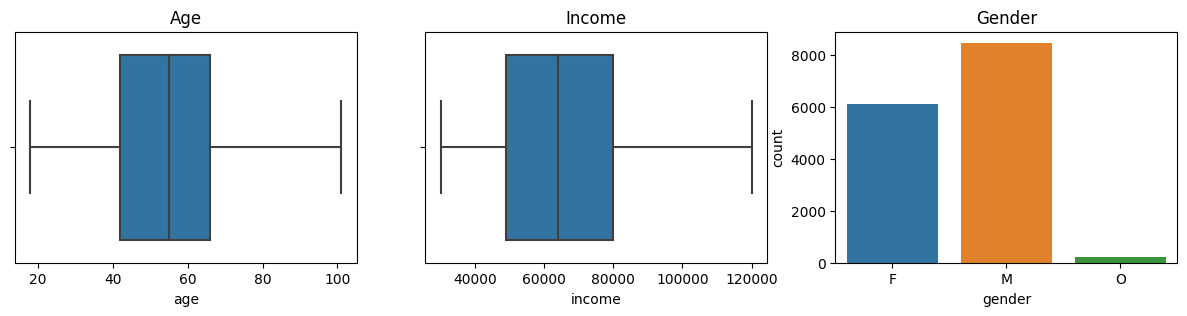

In [68]:
fig, axes = plt.subplots(1,3, figsize=(15,3))
sns.boxplot(x='age', data=profile, ax=axes[0])
axes[0].set_title('Age')

sns.boxplot(x='income', data=profile, ax=axes[1])
axes[1].set_title('Income')
                  
sns.countplot(x='gender', data=profile, ax=axes[2])
axes[2].set_title('Gender')
plt.show()

In [69]:
profile['gender'].value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

> Gender 가 남성도 여성도 아닌 변수가 소량 섞여있다. 제거해주도록 한다

In [70]:
profile = profile[~(profile['gender'] =='O')]

In [71]:
print(f'Age 왜도: {round(profile.age.skew(), 2)}')
print(f'Age 첨도: {round(profile.age.kurt(), 2)}')
print(f'Income 왜도: {round(profile.income.skew(), 2)}')
print(f'Income 첨도: {round(profile.income.kurt(), 2)}')


Age 왜도: -0.08
Age 첨도: -0.51
Income 왜도: 0.4
Income 첨도: -0.56


> Age의 경우 왜도가 별 의미가 없다. Income의 경우 왜도가 0.4로 양의 분포를 띈다. 즉, 꼬리가 오른쪽으로 길게 뻗은 꼴  
> 둘 다 첨도는 0에 가까운 수다

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Count'>

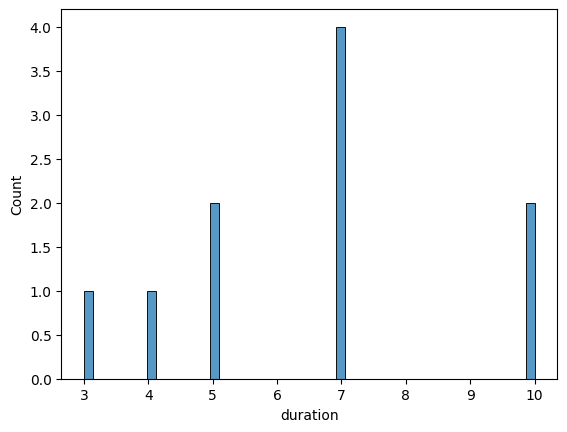

In [72]:
sns.histplot(pf['duration'], bins=50)

## 5) 이상치 탐색 (Z-score)
대단한 이상치는 없어보이나, profile의 age, income의 이상치만 걸러보도록 한다.

In [73]:
def outlier_remove(data, column, threshold = 3):
    z_score = np.abs(data[column]- np.mean(data[column]))/ np.std(data[column])
    filtered_data = data[z_score< threshold]
    data= filtered_data
    return data

In [74]:
outlier_remove(profile, 'age')

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [75]:
outlier_remove(profile, 'income')

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


> 걸러지는 게 없다. 넘어간다.

## 6) 상관관계 분석

In [76]:
corr_data= profile[['age', 'income','became_member_on']].corr()

<Axes: >

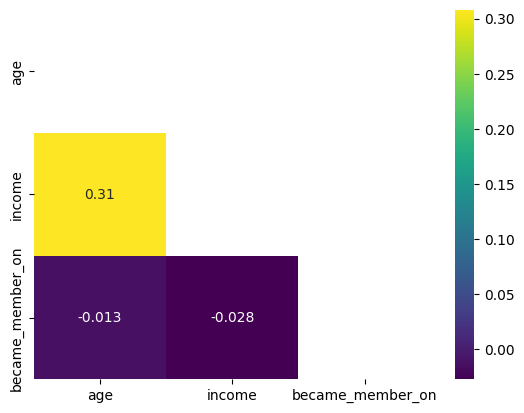

In [77]:
mask =np.triu(np.ones_like(corr_data))

sns.heatmap(corr_data, annot=True, cmap='viridis', mask=mask)

# 2.  추정

## 1) 모집단 특성 추정

In [78]:
transcript.event.value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

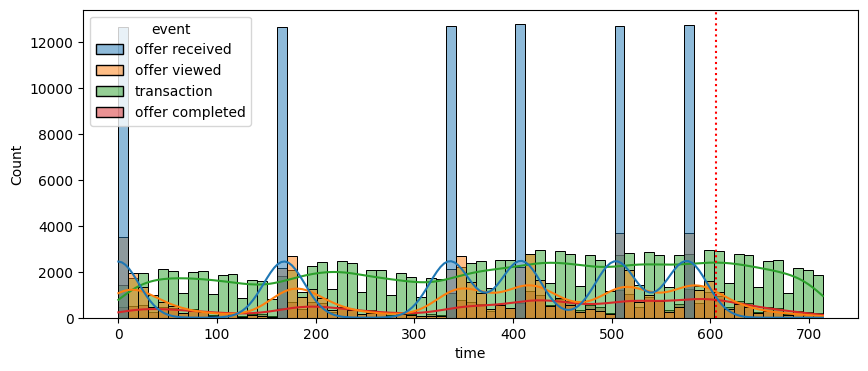

In [116]:
plt.figure(figsize= (10,4))
sns.histplot(data=transcript, x="time", kde=True, hue="event")
plt.axvline(transcript['time'].quantile(0.9), color='red', linestyle =':');

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

KeyError: 'income'

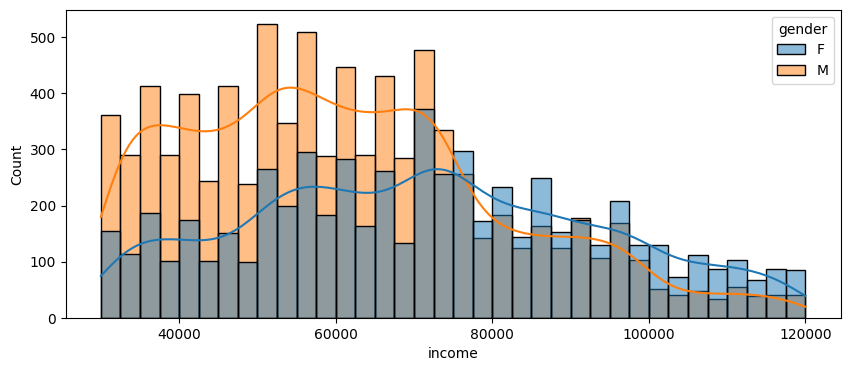

In [84]:
plt.figure(figsize= (10,4))
sns.histplot(data=profile, x="income", kde=True, hue="gender")
plt.axvline(transcript['income'].quantile(0.9), color='red', linestyle =':');

In [85]:
#profile 날짜형태로 바꾸기 
profile.loc[:, 'became_member_on'] = pd.to_datetime(arg=profile['became_member_on'], format='%Y%m%d')
profile.head()

/tmp/ipykernel_6959/2553825084.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2017-07-15 00:00:00', '2017-05-09 00:00:00', '2018-04-26 00:00:00',
 '2018-02-09 00:00:00', '2017-11-11 00:00:00', '2017-09-11 00:00:00',
 '2014-02-13 00:00:00', '2016-02-11 00:00:00', '2014-11-13 00:00:00',
 '2017-12-31 00:00:00',
 ...
 '2016-07-09 00:00:00', '2018-01-04 00:00:00', '2016-03-10 00:00:00',
 '2017-09-17 00:00:00', '2018-05-05 00:00:00', '2018-06-04 00:00:00',
 '2018-07-13 00:00:00', '2017-01-26 00:00:00', '2016-03-07 00:00:00',
 '2017-07-22 00:00:00']
Length: 14613, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  profile.loc[:, 'became_member_on'] = pd.to_datetime(arg=profile['became_member_on'], format='%Y%m%d')


,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


In [86]:
profile['Year'] = pd.DatetimeIndex(profile['became_member_on']).year
profile['month'] = pd.DatetimeIndex(profile['became_member_on']).month

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

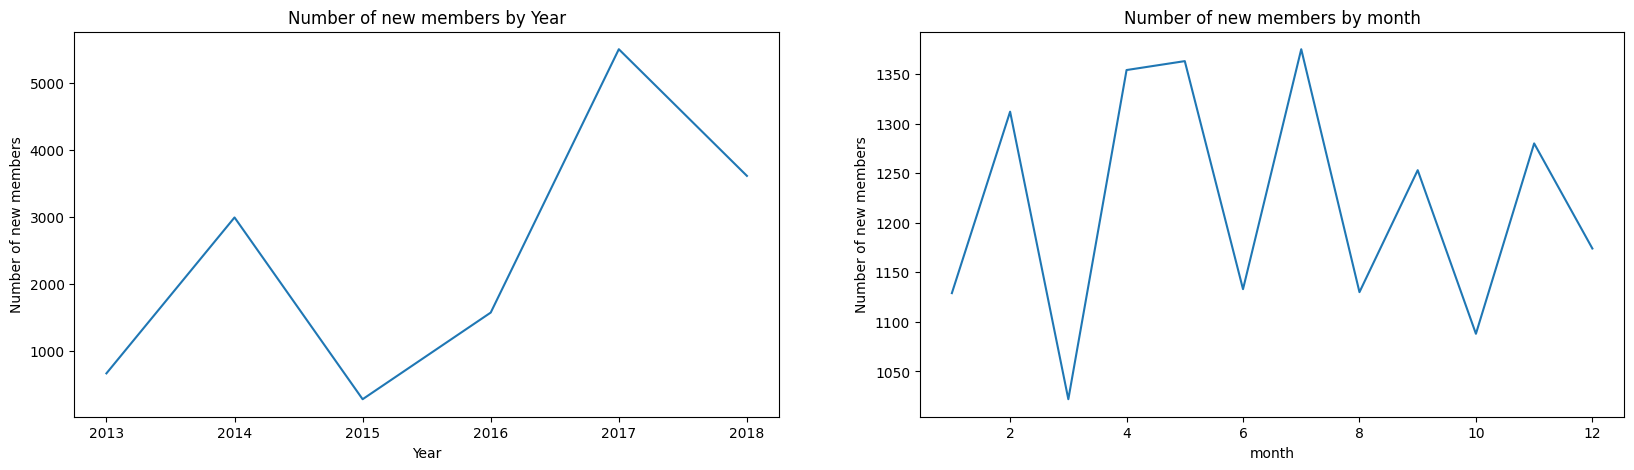

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
for i, col in enumerate(['Year', 'month']):
    sns.lineplot(ax=axes[i], x=profile[col].unique(), y=profile[col].value_counts())
    axes[i].set_title(f'Number of new members by {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Number of new members')

사람들이 어떤 promotion 받느냐에 따라 다르게 반응하는가?

transcript.head()
Unnamed: 0	person	event	value	time
0	0	78afa995795e4d85b5d9ceeca43f5fef	offer received	{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}	0
1	1	a03223e636434f42ac4c3df47e8bac43	offer received	{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}	0
2	2	e2127556f4f64592b11af22de27a7932	offer received	{'offer id': '2906b810c7d4411798c6938adc9daaa5'}	0
3	3	8ec6ce2a7e7949b1bf142def7d0e0586	offer received	{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}	0
4	4	68617ca6246f4fbc85e91a2a49552598	offer received	{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}	0

In [88]:
#transcript - value에서 amount 떼어내기

transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [91]:
#transcript - value에서 offer_id 떼어내기

transcript['offer_id'] = transcript['value'].apply(lambda x: eval(x).get('offer id') if 'offer id' in eval(x) else None)
transcript['amount'] = transcript['value'].apply(lambda x: eval(x).get('amount') if 'amount' in eval(x) else None)
transcript = transcript.drop('value', axis=1)

transcript.head()

,person,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [92]:
#합치기
profile_transcript = profile.merge(right=transcript, how='left', left_on='id', right_on='person')
profile_transcript.head()

,gender,age,id,became_member_on,income,Year,month,person,event,time,offer_id,amount
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,18,None,21.51
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,144,None,32.28
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,NaN
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,528,None,23.22


In [100]:
#전체 다 합쳐준다 

all_df = profile_transcript.merge(right= pf, how='left', left_on = 'offer_id', right_on = 'id')
all_df.head()

,gender,age,id_x,became_member_on,income,Year,month,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,id_y
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,18,None,21.51,NaN,NaN,NaN,NaN,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,144,None,32.28,NaN,NaN,NaN,NaN,NaN,NaN
2,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,NaN,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,528,None,23.22,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
all_df.columns
all_df.drop(['id_x','id_y'], axis=1, inplace=True)

In [110]:
transaction = all_df.loc[profile_transcript['event'] =='transaction']
offer = all_df.loc[profile_transcript['event'] != 'transaction']

In [111]:
transaction.head()

,gender,age,became_member_on,income,Year,month,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type
0,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,18,None,21.51,NaN,NaN,NaN,NaN,NaN
1,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,144,None,32.28,NaN,NaN,NaN,NaN,NaN
4,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,528,None,23.22,NaN,NaN,NaN,NaN,NaN
8,F,75,2017-05-09,100000.0,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,NaN,NaN,NaN,NaN,NaN
10,F,75,2017-05-09,100000.0,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,NaN,NaN,NaN,NaN,NaN


In [112]:
offer.head()

,gender,age,became_member_on,income,Year,month,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type
2,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
3,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,NaN,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational
5,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,528,None,NaN,NaN,NaN,NaN,NaN,NaN
6,F,75,2017-05-09,100000.0,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
7,F,75,2017-05-09,100000.0,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo


# 3. 검정

## 1) 가설검정

* 귀무가설 : 고객의 성별에 따른 income 분포가 관련 없다.
* 대립가설 : 고객의 성별에 따른 income 분포는 관련이 있다.

In [117]:
profile

,gender,age,id,became_member_on,income,Year,month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018,6
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018,7
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017,1
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016,3


## 2) 적절한 검정방법 선택 (t검정, 카이제곱 검정, ANOVA 등)

In [118]:
# t 검정

from scipy.stats import ttest_ind

male_income = profile[profile['gender'] == 'M']['income']
female_income = profile[profile['gender'] == 'F']['income']

t_stat, p_value = ttest_ind(male_income, female_income)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -28.653919643882944, p-value: 9.936318851561823e-176


In [119]:
# 카이제곱 검정

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(profile['gender'], pd.qcut(profile['income'], q=3, labels=['Low', 'Medium', 'High']))

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

Chi-squared statistic: 763.1134773176021, p-value: 1.9589072224841052e-166


In [127]:
contingency_table

income,Low,Medium,High
gender,,,
F,1548,1820,2761
M,3519,2912,2053


In [125]:
profile['income'].quantile([0.33, 0.66, 1])

0.33     54000.0
0.66     73000.0
1.00    120000.0
Name: income, dtype: float64

In [126]:
# ANOVA 검정

from scipy.stats import f_oneway

profile['income_category'] = pd.cut(profile['income'], bins=[-float('inf'), 54000, 73000, 120000], labels=['Low', 'Medium', 'High'])

income_categories = ['Low', 'Medium', 'High']
groups = [profile[profile['income_category'] == cat]['income'] for cat in income_categories]

f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 35063.15949032399, p-value: 0.0


## 3~4) 검정 수행 및 결과 해석 / 검정 유의성 평가 (p값, 신뢰구간)

* 우선, 가장 적절한 건 카이제곱 검정이다. 두 범주형 변수 간의 독립성을 검정하기 위해 사용된다. 성별, income이 모두 범주형 변수이다.

> 카이제곱 값 :  763.11 으로 매우 크게 나왔다. 즉, 성별과 Income간 강한 상관관계가 있음을 의미한다.  
> p값 : 매우 작은 0에 가까운 값이 나왔다. 따라서, 귀무가설을 기각할 충분한 증거가 있음을 나타낸다.  

## 5) 검정결과에 대한 해석 및 결론 도출

> 결론적으로, gender, income 분포는 통계적으로 유의하게 관련이 있다고 결론내릴 수 있다

> time, became_member_on 도 궁금하다. 고객의 가입기간과 promotion 배포 시점이 크게 상관이 있을까?

In [133]:
from datetime import datetime

all_df['became_member_on'] = pd.to_datetime(all_df['became_member_on'], format="%Y%m%d")

current_time = datetime.now().date()

print(current_time)

2024-02-02


In [138]:
all_df['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

> 최대값이 2018-07-26 이니까, 2018-12-31 기준으로 가입 기간을 보자

In [140]:
from datetime import datetime

# 'became_member_on' 컬럼을 datetime 형식으로 변환
all_df['became_member_on'] = pd.to_datetime(all_df['became_member_on'], format='%Y%m%d')

# 날짜 차이 계산
time_difference = datetime.strptime('2018-12-31', '%Y-%m-%d') - all_df['became_member_on']

print(time_difference)

0        534 days
1        534 days
2        534 days
3        534 days
4        534 days
           ...   
268786   527 days
268787   527 days
268788   527 days
268789   527 days
268790   527 days
Name: became_member_on, Length: 268791, dtype: timedelta64[ns]


> 시간을 빼서 가입한지 얼마나 됐는지에 대한 새로운 컬럼을 만드려고 했는데 에러가 난다. 알고보니, current time은 datetime 객체, all_df는 문자열로 되어있으므로, 이걸 datetime 형식으로 맞춰줘야 한다.   
> 성공!! 안 되던 코드가 잘 돌면 엄청 뿌듯하다 :)   
> 그럼 이제, 가입기간이랑, time의 상관관계를 보자

In [141]:
all_df['been_member_period'] = time_difference

In [145]:
all_df.head(3)

,gender,age,became_member_on,income,Year,month,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,been_member_period
0,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,18,None,21.51,NaN,NaN,NaN,NaN,NaN,534 days
1,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,144,None,32.28,NaN,NaN,NaN,NaN,NaN,534 days
2,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,534 days


In [143]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268791 entries, 0 to 268790
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   gender              268791 non-null  object         
 1   age                 268791 non-null  int64          
 2   became_member_on    268791 non-null  datetime64[ns] 
 3   income              268791 non-null  float64        
 4   Year                268791 non-null  int32          
 5   month               268791 non-null  int32          
 6   person              268791 non-null  object         
 7   event               268791 non-null  object         
 8   time                268791 non-null  int64          
 9   offer_id            114672 non-null  object         
 10  amount              122176 non-null  float64        
 11  reward              114672 non-null  float64        
 12  channels            114672 non-null  object         
 13  difficulty    

In [146]:
all_df[['been_member_period', 'time']].corr()

,been_member_period,time
been_member_period,1.00000,0.00703
time,0.00703,1.00000


> 딱히 관계가... 전혀 없어보이는데

In [149]:
chi_test = pd.crosstab(all_df['been_member_period'], pd.qcut(all_df['time'], q=3, labels=['Early', 'Middle', 'Late']))

chi2_stat, p_value, dof, expected = chi2_contingency(chi_test)

print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

Chi-squared statistic: 5031.114720203555, p-value: 2.795443028382724e-66


# 4. 회귀 분석

In [198]:
all_df.head()

,gender,age,became_member_on,income,Year,month,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,been_member_period,gender_F,gender_M
0,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,18,None,21.51,NaN,NaN,NaN,NaN,NaN,534 days,True,False
1,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,144,None,32.28,NaN,NaN,NaN,NaN,NaN,534 days,True,False
2,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,534 days,True,False
3,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,NaN,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational,534 days,True,False
4,F,55,2017-07-15,112000.0,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,528,None,23.22,NaN,NaN,NaN,NaN,NaN,534 days,True,False


In [203]:
all_df.drop(['gender', 'became_member_on', 'Year','month'], axis=1)

,age,income,person,event,time,offer_id,amount,reward,channels,difficulty,duration,offer_type,been_member_period,gender_F,gender_M
0,55,112000.0,0610b486422d4921ae7d2bf64640c50b,transaction,18,None,21.51,NaN,NaN,NaN,NaN,NaN,534 days,True,False
1,55,112000.0,0610b486422d4921ae7d2bf64640c50b,transaction,144,None,32.28,NaN,NaN,NaN,NaN,NaN,534 days,True,False
2,55,112000.0,0610b486422d4921ae7d2bf64640c50b,offer received,408,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,534 days,True,False
3,55,112000.0,0610b486422d4921ae7d2bf64640c50b,offer received,504,3f207df678b143eea3cee63160fa8bed,NaN,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational,534 days,True,False
4,55,112000.0,0610b486422d4921ae7d2bf64640c50b,transaction,528,None,23.22,NaN,NaN,NaN,NaN,NaN,534 days,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268786,62,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer completed,480,None,NaN,NaN,NaN,NaN,NaN,NaN,527 days,True,False
268787,62,82000.0,e4052622e5ba45a8b96b59aba68cf068,transaction,486,None,19.47,NaN,NaN,NaN,NaN,NaN,527 days,True,False
268788,62,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer viewed,546,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0,"['web', 'email', 'mobile', 'social']",5.0,5.0,bogo,527 days,True,False
268789,62,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer received,576,3f207df678b143eea3cee63160fa8bed,NaN,0.0,"['web', 'email', 'mobile']",0.0,4.0,informational,527 days,True,False


### One Hot Encoding 부터 하자

## 1) 회귀 모델 선택

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [182]:
gender_dummies = pd.get_dummies(all_df['gender'], prefix='gender')
all_df = pd.concat([all_df, gender_dummies], axis=1)

In [187]:
# 필요한 독립 변수 선택
independent_vars = ['age', 'income', 'gender_F', 'gender_M']

# X: 독립 변수들, y: 종속 변수
X = all_df[independent_vars]


transaction_indices = all_df[all_df['event'] =='transaction'].index

# 'transaction' 이벤트에 해당하는 행에 대한 레이블 생성
y = pd.Series(0, index=all_df.index)  # 모든 행에 대해 초기화
y.loc[transaction_indices] = 1  # 'transaction' 이벤트에 해당하는 행에 대해 레이블을 1로 설정

In [195]:
from sklearn.metrics import mean_squared_error, r2_score

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.244581905220257
R-squared: 0.012882228183708988


> MSE : 0.2445 로 Mean Squared Error가 낮게 나왔다. 즉, 테스트 데이터에서 예측한 값과 실제 값 사이 평균제곱오차가 작다는 뜻이다. 작을수록 모델 성능이 좋다. 

In [191]:
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

   Variable  Coefficient
0       age    -0.000805
1    income    -0.000002
2  gender_F    -0.003377
3  gender_M     0.003377


> 상대적으로 독립변수들의 영향력이 transaction 여부에 미미하다

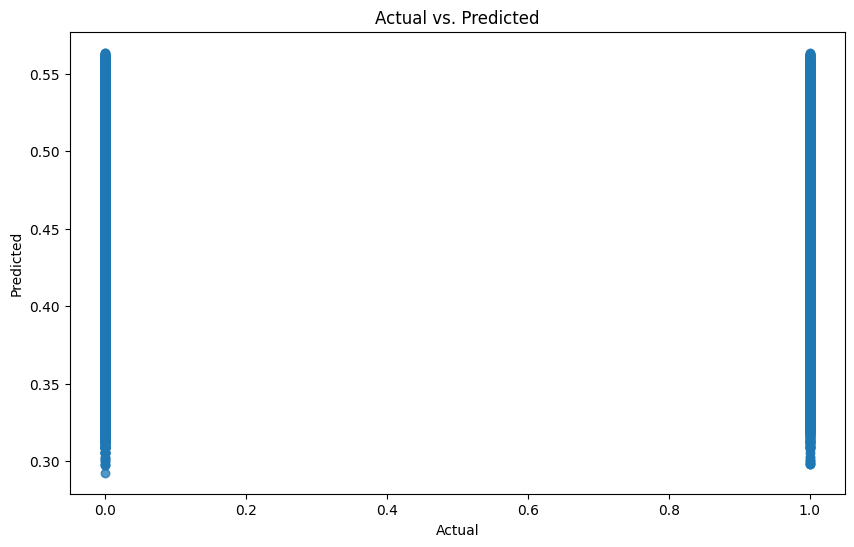

In [196]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

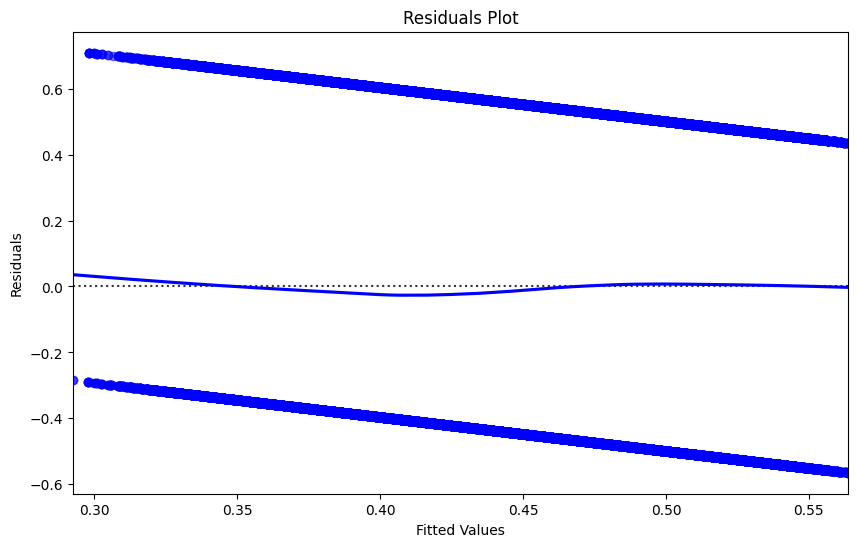

In [197]:
# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', scatter_kws={'alpha': 0.5})
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

> 망한거 같다. 다시 

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 'offer received' 이벤트에 대한 행만 선택
received_df = all_df[all_df['event'] == 'offer received']

# 독립 변수 (features) 선택
independent_vars = ['age', 'income', 'gender_F', 'gender_M']

# X: 독립 변수들, y: 종속 변수
X = received_df[independent_vars]
y = (received_df['event'] == 'transaction').astype(int)

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

unique_classes = y_train.unique()

if len(unique_classes) < 2:
    # Handle the case where there's only one class in y_train
    print("Not enough classes in the training set.")
else:
    # Continue with logistic regression
    # 로지스틱 회귀 모델 초기화 및 학습
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # 테스트 세트를 사용하여 예측
    y_pred = model.predict(X_test)

    # 모델 평가: 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # 분류 보고서 출력
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Not enough classes in the training set.
